In this project, we'll build a k-means clustering algorithm from scratch. Clustering is an unsupervised machine learning technique that can find patterns in your data. K-means is one of the most popular forms of clustering.

We'll create our algorithm using python and pandas. We'll then compare it to the reference implementation from scikit-learn.

Project Steps:

1.Write out pseudocode for the algorithm

2.Code the k-means algorithm

3.Plot the clusters from the algorithm

4.Compare performance to the scikit-learn algorithm

**Overview of K-means**
K-means is an unsupervised machine learning technique that allow us to cluster data points. This enables us to find patterns in the data that can help us analyze it more effectively. K-means is an iterative algorithm, which means that it will converge to the optimal clustering over time.

To run a k-means clustering:

1.Specify the number of clusters you want (usually referred to as k).
2.Randomly initialize the centroid for each cluster. The centroid is the data point that is in the center of the cluster.
3.Determine which data points belong to which cluster by finding the closest centroid to each data point.
4.Update the centroids based on the geometric mean of all the data points in the cluster.
5.Run 3 and 4 until the centroids stop changing. Each run is referred to as an iteration.

We'll be using data from 'https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset'

In [1]:
import pandas as pd
import numpy as np

In [2]:
players=pd.read_csv('/Users/dinakar/Downloads/EA sports FIFA22 player data/players_22.csv')

/Users/dinakar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()

In [11]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


**Writing a Pseudocode**

**Further steps**

1.Scale data to standardize values
2.Initialize random centroids
3.Get labels for each data point
4.Create new centroids
5.Plot the centroids
6.Repeat 3-5 until the centroids stop changing

In [12]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [13]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [14]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [15]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [20]:
centroids = random_centroids(data, 5)

In [21]:
centroids

,0,1,2,3,4
overall,5.347826,3.608696,4.260870,6.434783,4.478261
potential,5.347826,5.782609,8.173913,5.347826,6.217391
wage_eur,1.271817,1.414878,1.042918,1.100143,1.014306
value_eur,1.035620,1.015001,1.066549,1.017578,1.051085
age,2.851852,3.592593,5.074074,5.814815,5.074074


Please refer the link to understand the lambda function I have used here.'https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/'


sample() function is used for random sampling without replacement.

In [22]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [23]:
labels = get_labels(data, centroids)

In [24]:
labels.value_counts()

3    7015
1    5553
0    3569
4    2418
2     610
dtype: int64

In [25]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [39]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

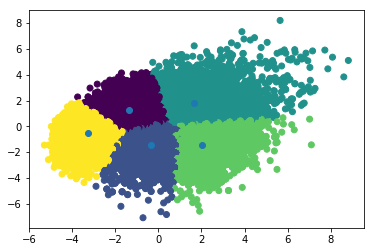

In [42]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

You can check the above section for different number of iterations and centriod counts. 

In [43]:
centroids

,0,1,2,3,4
overall,4.597603,4.526949,6.975166,5.797681,2.636154
potential,6.476281,4.517441,7.308451,5.372644,4.751423
wage_eur,1.076181,1.060743,1.694232,1.200367,1.017297
value_eur,1.067777,1.035331,1.454851,1.066750,1.014497
age,2.738321,4.890977,4.375977,6.747931,2.451591


In [44]:
labels.value_counts()

0    4785
1    4393
3    3890
2    3601
4    2496
dtype: int64

In [52]:
players[labels == 0][["short_name"] + features].head()

,short_name,overall,potential,wage_eur,value_eur,age
3568,Sebas Couteira,72,72,9000.0,2800000.0,21
3570,Gustavo Lobateiro,72,72,14000.0,2800000.0,21
3574,Teixe Gaúcho,72,72,8000.0,2400000.0,21
3581,Vanderleiton,72,72,12000.0,2400000.0,21
3586,Pimentiscinho,72,72,11000.0,2500000.0,21


In [46]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3,4
overall,4.576454,7.789039,3.220967,6.181560,5.388787
potential,4.402194,7.997686,5.293225,5.781084,6.680427
wage_eur,1.057091,2.439628,1.024005,1.298292,1.169174
value_eur,1.030606,2.023357,1.021687,1.096343,1.108341
age,5.435237,4.734644,2.607642,6.624894,3.371113
